# Exploring common pdfs 


In [21]:
import numpy as np
import pandas as pd

from random import seed 
from random import gauss 
from random import uniform
import matplotlib.pyplot as plt
from scipy import stats

from scipy.stats import binom
from scipy.stats import randint
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import uniform

# Tossing a coin
 - John Kerrich (1903–1985), born UK, grew up SA, mathematician, Bsc Wits.
     -  noted for a series of experiments in probability conducted while interned in Nazi-occupied Denmark in the 1940s.

<img src="kerrich.png" width=200 height=200 margin-right:600px />


- Is my coin *biased*?


# Tossing a coin
 - Kerrich conducted a famous experiment to demonstrate the asymptotic nature of probability

<img src="kerrich_coin_tosses.png" width=400 height=400 margin-right:400px />


 - **The law of large numbers**
   -  ${\overline {X}}_{n}={\frac {1}{n}}(X_{1}+\cdots +X_{n})$ converges to the expectation value as ${ n\to \infty}$:

    - ${\displaystyle {\overline {X}}_{n}\to \mu \quad {\textrm {as}}\ n\to \infty}$
 
 - **When would this break down?**



<Figure size 640x480 with 0 Axes>

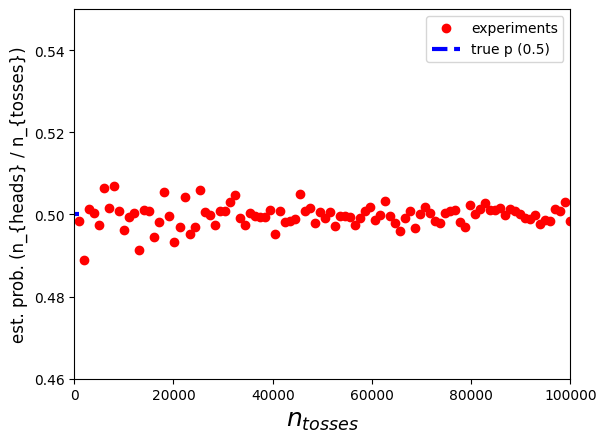

In [22]:
P = 0.5 # unbiased coin
max_size  = 100000
n_exp = 100
exp_sizes = np.linspace(1, max_size, n_exp)
est_probs = np.array([])

for nt in exp_sizes:
    tosses = np.random.rand(int(nt)) # array of uniform random number between 0 and 1
    counts = np.where(tosses < P, 1, 0) # corresponding array: 1 for trials with x < P, 0 for all others
    results = np.sum(counts)
    est_probs = np.append(est_probs, float(results/nt))
    
plt.figure()
fig, ax = plt.subplots(1, 1)
ax.plot(exp_sizes, est_probs, 'ro',  label='experiments')
plt.ylim(0.46, 0.55)
plt.xlim(0, max_size)

labelx = ax.set_xlabel("$n_{tosses}$", fontsize = 18)
labely = ax.set_ylabel("est. prob. (n_{heads} / n_{tosses})", fontsize = 12)
line_label = 'true p (' + str(P) + ')'
plt.hlines(P, 0.0, 1000, linewidth=3.0, linestyle="dashed",color='b', label=line_label)
plt.legend()
plt.show()

# Binomial pmf

- Consider an experiment consisting of $N$ independent trials, each with two possible results: 'success' and 'failure'
    - probability for success in each trial is a constant, $P$. 
    - experiment characterised by $n$ (total number of successes). 
- Repeat experiment $N_{exps}$ times
    - $n$ would occur with relative frequencies ($P(n)$) given by the **binomial pmf**.
    
- **Binomial pmf**: 
 $$  f (n; N, P) = \frac{N!}{n!(N - n)!} P^{n} (1-P)^{N-n} $$
 
- Nice and intuitive derivation in Cowan section 2.1

- Special case of **multinomial** pmf with arbitrary number of possible results.

In [23]:
N_tosses =10
P=0.5
##### run some toy experiments
est_probs = np.array([])
results = np.array([])

for i in range(0, 100000):
    tosses = np.random.rand(int(N_tosses)) # array of uniform random number between 0 and 1
    counts = np.where(tosses < P, 1, 0) # corresponding array: 1 for trials with x < P, 0 for all others
    result = np.sum(counts)
    results = np.append(results, result)

<Figure size 1200x800 with 0 Axes>

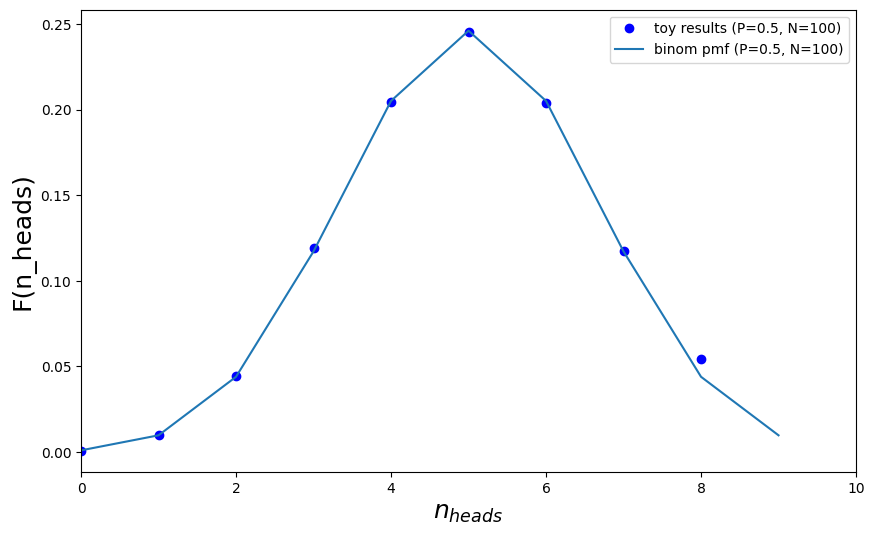

In [24]:
##### draw the binomial PDF
plt.figure(figsize=(12,8))
fig, ax = plt.subplots(1, 1, figsize=(10,6))
x = np.arange(binom.ppf(0.0000000001, N_tosses, P), binom.ppf(0.99999999999, N_tosses, P))

dataCounts, dataBins = np.histogram(results, bins=x)
dataCountsNorm = dataCounts/(np.sum(dataCounts)) # for pmf, sum of counts must equal 1

plotBins = np.arange(0,9)
ax.plot(plotBins, dataCountsNorm, 'bo',  label='toy results (P=0.5, N=100)')
ax.plot(dataBins, binom.pmf(dataBins, N_tosses, P),  label='binom pmf (P=0.5, N=100)')
unResults = np.linspace(0, 10, 10)
plt.xlim(0, 10)
labelx = ax.set_xlabel("$n_{heads}$", fontsize = 18)
labely = ax.set_ylabel("F(n_heads)", fontsize = 18)
plt.legend()
plt.show()

# Poisson pmf

- What if the number of trials $N$ is very large but the probaility of "success" P is very small such that $\nu = PN$ is some finite number
- In this limit, the binomial pmf simplifes to 

 $$  f (n; \nu) = \frac{\nu^{n}}{n!} e^{-\nu} $$
 
$$ \nu =\operatorname {E} (n)=\operatorname {Var} (n)$$
 
- This is the **Poisson pmf** an incredibly important pdf to particle, nuclear, and high energy physics
- The Standard Deviation of the Poisson pmf is simply $\sqrt{(Var(n))} = \sqrt{n}$
- Does this remind you of anything?
    - Does this even make any sense?

# Why is the poisson pmf so important?

- Large number of trials with small probability of "success" describes almost all particle physics experiments
- Radioactive decay: 
  - detector is read at high frequency for decay signal
  - each trial has low probability for observing decay
  - but the number of expected detected decays after a time **t** is finite

In [25]:
# Trvial 'counting experiment' performed by our computer!
P = 0.0001 # low probability of observation
N_trials = 100000 # but large number of 'trials'
N_exps = 1000 # repeating the experiment 

trials = np.random.rand(N_exps,N_trials) # array of *uniform* random number between 0 and 1
counts = np.where(trials < P, 1, 0) # corresponding array: 1 for trials with x < P, 0 for all others
results = np.sum(counts, axis=1) # sum across rows to get vector of number of observations in each experiment

# Nowhere here is a Poisson pdf invoked!

<Figure size 640x480 with 0 Axes>

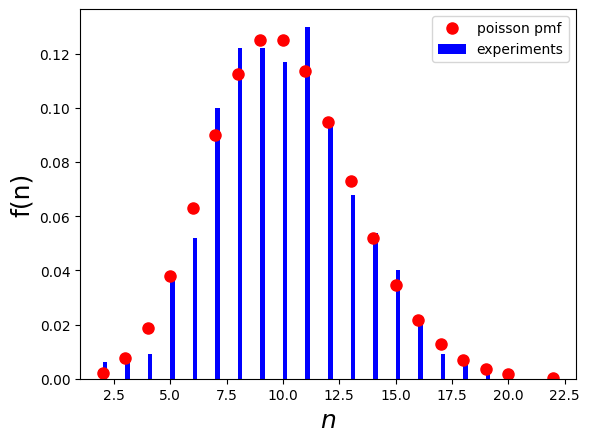

In [26]:
mu = N_trials*P

unResults = np.unique(results) # we extract the set values the result can assume to help us plot the pmf
dataCounts, dataBins = np.histogram(results, bins=100)
dataCountsNorm = dataCounts/(np.sum(dataCounts)) # for pmf, sum of counts must equal 1
binCentres = (dataBins[:-1] + dataBins[1:]) / 2
width = np.diff(dataBins)

plt.figure()
fig, ax = plt.subplots(1, 1)
plt.bar(binCentres, dataCountsNorm, align='center', width=width, label='experiments', color='b')

ax.plot(unResults, poisson.pmf(unResults, mu),'ro', ms=8, label='poisson pmf')
labelx = ax.set_xlabel("$n$", fontsize = 18)
labely = ax.set_ylabel("f(n)", fontsize = 18)
plt.legend()
plt.show()

# Surprisingly poissonian proceses

- Goals scored in a football game
- Large number of trials/attempts, each with a low probability of success, in one game/experiment


- Lets look a the distribution of goals scored in all the games of the English Premier League in 2020

<img src="epl2020.png" width=700 height=700 />


In [27]:
df_epl = pd.read_csv("epl2020.csv")
results = np.array(df_epl["scored"])
unResults = np.unique(results) # we extract the set values the result can assume to help us plot the pmf
df_epl.head()

,Unnamed: 0,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,...,AF.x,AC.x,AY.x,AR.x,B365H.x,B365D.x,B365A.x,HtrgPerc,AtrgPerc,matchDay
0,1,h,2.234560,0.842407,2.234560,0.842407,11,5,4,1,...,9,2,2,0,1.14,10.0,19.00,0.466667,0.416667,Fri
1,2,a,0.842407,2.234560,0.842407,2.234560,5,11,1,4,...,9,2,2,0,1.14,10.0,19.00,0.466667,0.416667,Fri
2,3,a,3.183770,1.200300,2.422640,1.200300,9,1,5,0,...,13,1,2,0,12.00,6.5,1.22,0.600000,0.642857,Sat
3,4,h,1.200300,3.183770,1.200300,2.422640,1,9,0,5,...,13,1,2,0,12.00,6.5,1.22,0.600000,0.642857,Sat
4,5,h,1.340990,1.598640,1.340990,1.598640,4,6,1,1,...,19,4,1,0,1.95,3.6,3.60,0.230769,0.375000,Sat


<Figure size 640x480 with 0 Axes>

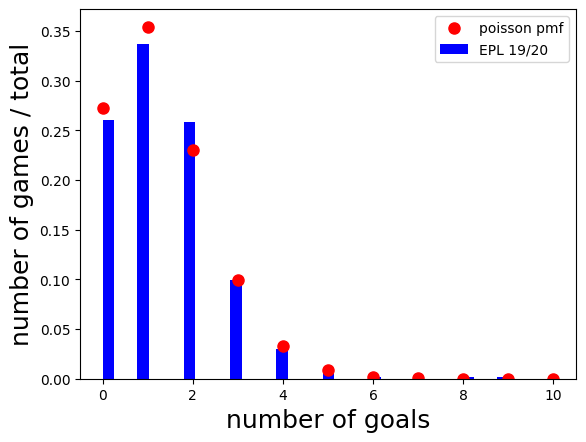

In [28]:
dataCounts, dataBins = np.histogram(results, bins=35)
dataCountsNorm = dataCounts/(np.sum(dataCounts)) # for pmf, sum of counts must equal 1
binCentres = (dataBins[:-1] + dataBins[1:]) / 2
width = np.diff(dataBins)

mu = 1.3 # an educated guess...

plt.figure()
fig, ax = plt.subplots(1, 1)
x = np.arange(poisson.ppf(0.001, mu), poisson.ppf(0.9999999, mu))
ax.plot(x, poisson.pmf(x, mu), 'ro', ms=8, label='poisson pmf')
plt.bar(binCentres, dataCountsNorm, align='center', width=width, label='EPL 19/20', color='b')
labelx = ax.set_xlabel("number of goals", fontsize = 18)
labely = ax.set_ylabel("number of games / total", fontsize = 18)
plt.legend()
plt.show()

# The 'classic' poisson example: death by Prussian horse kick

- In a classic example, Bortkiewicz (1898) studied the distribution of... 
    - **122 men kicked to death by horses among ten Prussian army corps over 20 years.**
- In most years in most corps, no one dies from being kicked; in one corp in one year, four men were kicked to death.
   - Does this mean something was amiss in this particular corp? 
   - Around 1890 Ladislaus Bortkiewicz wrote a book called *The Law of Small Numbers*
   

<img src="Ladislaus_Bortkiewicz.jpeg" width=200 height=200 />

In [29]:
dfPrussianHorses = pd.read_table("HorseKicks.txt")
dfPrussianHorsesData = dfPrussianHorses.iloc[:, 1:15]
data = dfPrussianHorsesData.to_numpy().ravel()
dfPrussianHorses

,Year,GC,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C14,C15
0,1875,0,0,0,0,0,0,0,1,1,0,0,0,1,0
1,1876,2,0,0,0,1,0,0,0,0,0,0,0,1,1
2,1877,2,0,0,0,0,0,1,1,0,0,1,0,2,0
3,1878,1,2,2,1,1,0,0,0,0,0,1,0,1,0
4,1879,0,0,0,1,1,2,2,0,1,0,0,2,1,0
5,1880,0,3,2,1,1,1,0,0,0,2,1,4,3,0
6,1881,1,0,0,2,1,0,0,1,0,1,0,0,0,0
7,1882,1,2,0,0,0,0,1,0,1,1,2,1,4,1
8,1883,0,0,1,2,0,1,2,1,0,1,0,3,0,0
9,1884,3,0,1,0,0,0,0,1,0,0,2,0,1,1


<Figure size 640x480 with 0 Axes>

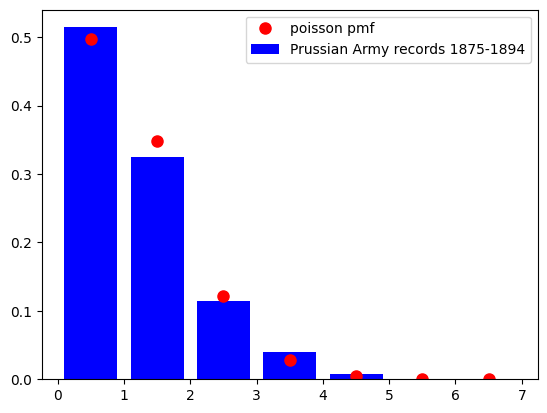

In [30]:
plt.figure()
fig, ax = plt.subplots(1, 1)
unResults = np.unique(dfPrussianHorsesData)

bins = [x for x in range(8)]

dataCounts, dataBins = np.histogram(data, bins=bins)
dataCountsNorm = dataCounts/(np.sum(dataCounts)) # for pmf, sum of counts must equal 1
binCentres = (dataBins[:-1] + dataBins[1:]) / 2

poisBins = bins[0:7]
ax.plot(binCentres, poisson.pmf(poisBins, 0.7), 'ro', ms=8, label='poisson pmf')
plt.bar(binCentres, dataCountsNorm, align='center', label='Prussian Army records 1875-1894', color='b')
plt.legend()

# Uniform pdf


<Figure size 640x480 with 0 Axes>

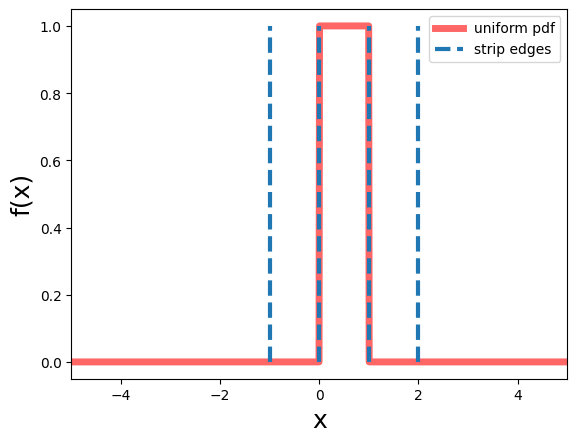

In [31]:
n = 100000
result = np.random.uniform(0, 1, n) #uniform
plt.figure()
fig, ax = plt.subplots(1, 1)
fr = uniform()
x = np.linspace(-5.0,5,1000)

ax.plot(x, fr.pdf(x),'r-', lw=5, alpha=0.6, label='uniform pdf')

ax.set_xlim(-5.0, 5.0)
plt.vlines(-1.0, 0.0, 1.0, linewidth=3.0, linestyle="dashed")
plt.vlines(0.0, 0.0, 1.0, linewidth=3.0, linestyle="dashed", label="strip edges")
plt.vlines(1.0, 0.0, 1.0, linewidth=3.0, linestyle="dashed")
plt.vlines(2.0, 0.0, 1.0, linewidth=3.0, linestyle="dashed")

labelx = ax.set_xlabel("x", fontsize = 18)
labely = ax.set_ylabel("f(x)", fontsize = 18)
plt.legend()

# Gaussian (normal) pdf

$$  f(x; \mu, \sigma^{2}) = \frac{1}{\sqrt{2\pi\sigma^{2}}} \exp \big(  \frac{-(x-\mu)^{2}}{2\sigma^{2}} \big)$$
- $\mu$ and $\sigma$ are the mean and standard deviation respectively


# Gaussian (normal) pdf
- We see Gaussian distributions again, again and again...Why?
- **Central Limit Theorem**:
 -  sum of $n$ independent continuous random variables $x_i$ with means $\mu_i$ and variances $\sigma_i$ **becomes a Gaussian random variable** with mean $\mu = \sum^{n}_{i=1} \mu_{i}$ and variance $\sigma^{2} = \sum^{n}_{i=1} \sigma_{i}^{2}$ in the limit that $n$ approaches infinity 
- **Doesn't matter how the variables are distributed!!**

In [48]:
#Demo of Central Limit Theorem
# n random numbers, each distributed according to some arbitrary, continuous pdf, N = sum(n)
n  = 35
n_exps = 10000

nums = np.array([])
sums = np.array([])

dfCLT = pd.DataFrame()

for i in range(0,n_exps):
    #result = np.random.uniform(0, 1, n) #uniform
    #result = np.random.standard_exponential(n) #exponential
    #result = np.random.power(1.5, n) #power law
    result  = np.random.uniform(0, 1, n) + np.random.standard_exponential(n) + np.random.power(1.5, n)
    nums = np.append(nums, result)
    sum = np.sum(result)
    sums = np.append(sums, sum)

numsR = nums.reshape(n_exps,n)

dfCLT = pd.DataFrame(numsR,dtype=None, copy=False)
dfCLT["sum"] = sums
dfCLT

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,sum
0,0.566377,2.313092,1.538072,2.915222,3.112772,1.391217,2.194994,4.024887,0.495696,0.991901,...,1.606739,0.798806,1.890890,2.668050,2.817959,1.912066,1.239300,1.364749,1.216721,71.990696
1,1.281424,1.766888,2.565631,2.265747,0.429021,2.247579,2.303025,2.781055,1.825541,2.035738,...,1.989929,1.064483,4.375723,1.576618,1.150633,2.692736,3.128362,5.295393,1.065658,70.445700
2,2.895128,2.059416,2.469200,1.749707,1.116342,6.098216,1.098219,1.918319,4.905111,2.684971,...,1.217059,1.040803,1.977574,2.417665,1.576004,4.162907,0.994779,2.149566,0.809496,76.546297
3,1.778459,1.519960,1.674093,1.644217,1.522915,0.886539,2.051631,1.572449,1.337765,1.994318,...,2.623581,2.774451,2.610526,1.820893,2.097022,1.172758,3.142800,2.000839,3.653499,61.637636
4,1.396956,1.678331,2.807551,2.241571,1.741653,2.540858,1.257210,0.855049,5.240283,1.907539,...,1.957240,2.199883,1.535668,0.942481,1.305922,1.995428,2.182517,1.564152,2.188753,70.202500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.282958,2.247466,3.035877,0.915824,1.585258,1.905698,1.529173,1.977980,4.278664,1.258983,...,2.609569,2.212029,1.693733,0.762545,4.143804,3.080035,1.698857,1.929584,3.027192,81.325909
9996,1.645730,0.471328,3.104479,0.558806,1.613340,1.497008,2.475806,1.315433,1.989406,1.225144,...,3.306291,1.019868,1.349584,1.725644,1.503211,3.684053,1.775032,1.337707,1.237988,69.287697
9997,1.886552,1.285269,1.486427,0.753273,1.931613,2.698028,1.320294,2.993903,2.803437,2.494071,...,5.213301,0.900275,0.961593,1.481648,2.263117,2.268606,1.667492,1.713643,1.689411,82.572806
9998,4.745791,3.297908,0.597657,1.747685,0.952708,2.218571,0.746556,1.353322,3.721054,0.604981,...,1.100569,3.213963,1.336536,0.942655,3.565428,1.245038,2.227225,1.781708,2.340741,64.916433


<Figure size 640x480 with 0 Axes>

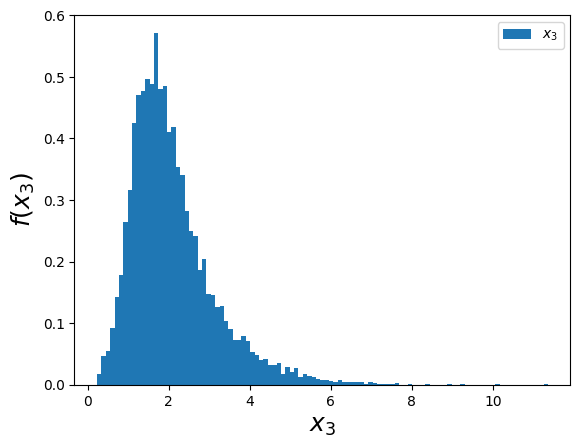

In [49]:
plt.figure()
fig, ax = plt.subplots(1, 1)

text = "$x_3$"
#distribution of the 3rd random number to show the underlying pdf
h = plt.hist(dfCLT.iloc[:,18], bins='auto', density=True, label=text)
labelx = ax.set_xlabel("$x_3$", fontsize = 18)
labely = ax.set_ylabel("$f(x_3)$", fontsize = 18)
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

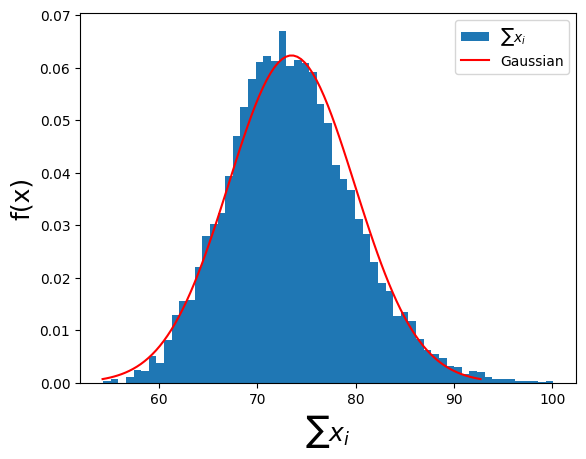

In [50]:
plt.figure()
fig, ax = plt.subplots(1, 1)

text = "$\sum x_{i}$"
h = plt.hist(dfCLT["sum"], bins='auto', density=True, label=text)
mu = np.mean(dfCLT["sum"])
std = np.std(dfCLT["sum"])
x = np.linspace(mu-(3*std), mu+(3*std),100)

ax.plot(x, norm.pdf(x,mu, std), 'r-', ms=8, label='Gaussian')
labelx = ax.set_xlabel("$\sum x_{i}$", fontsize = 18)
labely = ax.set_ylabel("f(x)", fontsize = 18)
plt.legend()
plt.show()

# Central Limit Theorem

 - Formal justification for treating measurement uncertainties as Gaussian-distributed random variables 
 - Assumes total uncertainty is the sum of a large number of small contributions
 
- **Many random variables summing together to produce our variable of interest is typical of particle physics!**

# Crystall ball pdf

- consists of a Gaussian core portion and a power-law low-end tail, below a certain threshold
- used to model various lossy processes in high-energy physics

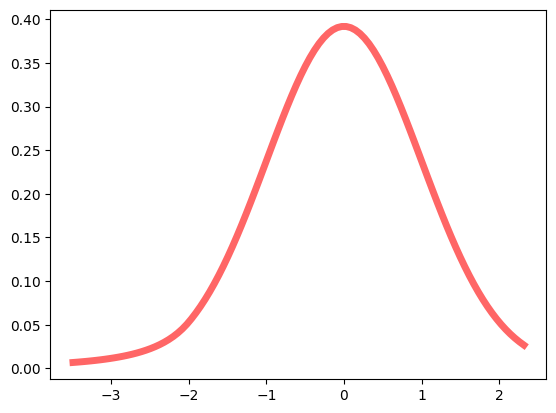

In [35]:
from scipy.stats import crystalball
beta, m = 2, 3
mean, var, skew, kurt = crystalball.stats(beta, m, moments='mvsk')

fig, ax = plt.subplots(1, 1)

x = np.linspace(crystalball.ppf(0.01, beta, m), crystalball.ppf(0.99, beta, m), 100)

ax.plot(x, crystalball.pdf(x, beta, m), 'r-', lw=5, alpha=0.6, label='crystalball pdf')